# **ASM2 -- VGG**

In [ ]:
#import libraries
import numpy as np
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar100
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **Pre-processing**

In [40]:
# load cifar100
(x_img_train,y_label_train), (x_img_test, y_label_test)=cifar100.load_data() 

#z-score normilization
mean = np.mean(x_img_train, axis=(0, 1, 2, 3))
std = np.std(x_img_train, axis=(0, 1, 2, 3))

x_img_train = (x_img_train - mean) / (std + 1e-7)#trick
x_img_test = (x_img_test - mean) / (std + 1e-7) 

#one-hot encode
y_label_train = tf.keras.utils.to_categorical(y_label_train, 100)

# split data
(X_train, X_valid) = x_img_train[5000:], x_img_train[:5000]
(y_train, y_valid) = y_label_train[5000:], y_label_train[:5000]
 
print(X_train.shape, 'train examples')
print(X_valid.shape, 'valid examples')
print(x_img_test.shape, 'test examples')
print(y_label_test.shape)
print(y_label_test)

(45000, 32, 32, 3) train examples
(5000, 32, 32, 3) valid examples
(10000, 32, 32, 3) test examples
(10000, 1)
[[49]
 [33]
 [72]
 ...
 [51]
 [42]
 [70]]


## **Data Augmentation**

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,  
    width_shift_range=0.1, 
    height_shift_range=0.1,  
    horizontal_flip=True) 

datagen.fit(X_train)

## **VGG Model**

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow import keras
import torch

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
# model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)       

## **Train**

In [43]:
batch_size = 128

opt = keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(datagen.flow(X_train, y_train,batch_size=batch_size),
              # callbacks=[reduce_lr],
              epochs=60,
              validation_data=(X_valid, y_valid),
              shuffle=True)

Epoch 1/60
352/352 [==============================] - 47s 124ms/step - loss: 4.4932 - accuracy: 0.0580 - val_loss: 5.5178 - val_accuracy: 0.0654
Epoch 2/60
352/352 [==============================] - 44s 124ms/step - loss: 3.8318 - accuracy: 0.1273 - val_loss: 3.5986 - val_accuracy: 0.1786
Epoch 3/60
352/352 [==============================] - 42s 118ms/step - loss: 3.4486 - accuracy: 0.1818 - val_loss: 3.2411 - val_accuracy: 0.2184
Epoch 4/60
352/352 [==============================] - 42s 119ms/step - loss: 3.1813 - accuracy: 0.2233 - val_loss: 3.0615 - val_accuracy: 0.2620
Epoch 5/60
352/352 [==============================] - 42s 119ms/step - loss: 2.9643 - accuracy: 0.2583 - val_loss: 2.7831 - val_accuracy: 0.2978
Epoch 6/60
352/352 [==============================] - 40s 115ms/step - loss: 2.7844 - accuracy: 0.2916 - val_loss: 3.2288 - val_accuracy: 0.2870
Epoch 7/60
352/352 [==============================] - 40s 112ms/step - loss: 2.6345 - accuracy: 0.3221 - val_loss: 2.5967 - val_ac

## **Test**

In [45]:
y_test = tf.keras.utils.to_categorical(y_label_test, 100)
vgg_pred = model.predict(x_img_test)
score = model.evaluate(x_img_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.5709999799728394


## **Label Names**

In [46]:
labelNames =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
           'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
           'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
           'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
           'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
           'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
           'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
           'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

## **Results**

-----------------VGG Report---------------
F1 score: 0.5708118185088731
Accuracy score: [1.6874635219573975, 0.5709999799728394]
Confusion matrix: 
 [[89  0  0 ...  0  0  0]
 [ 0 66  0 ...  0  0  2]
 [ 0  0 47 ...  0 12  1]
 ...
 [ 0  1  0 ... 45  0  1]
 [ 0  0  8 ...  0 53  2]
 [ 0  0  0 ...  0  0 80]]
Plotting confusion matrix


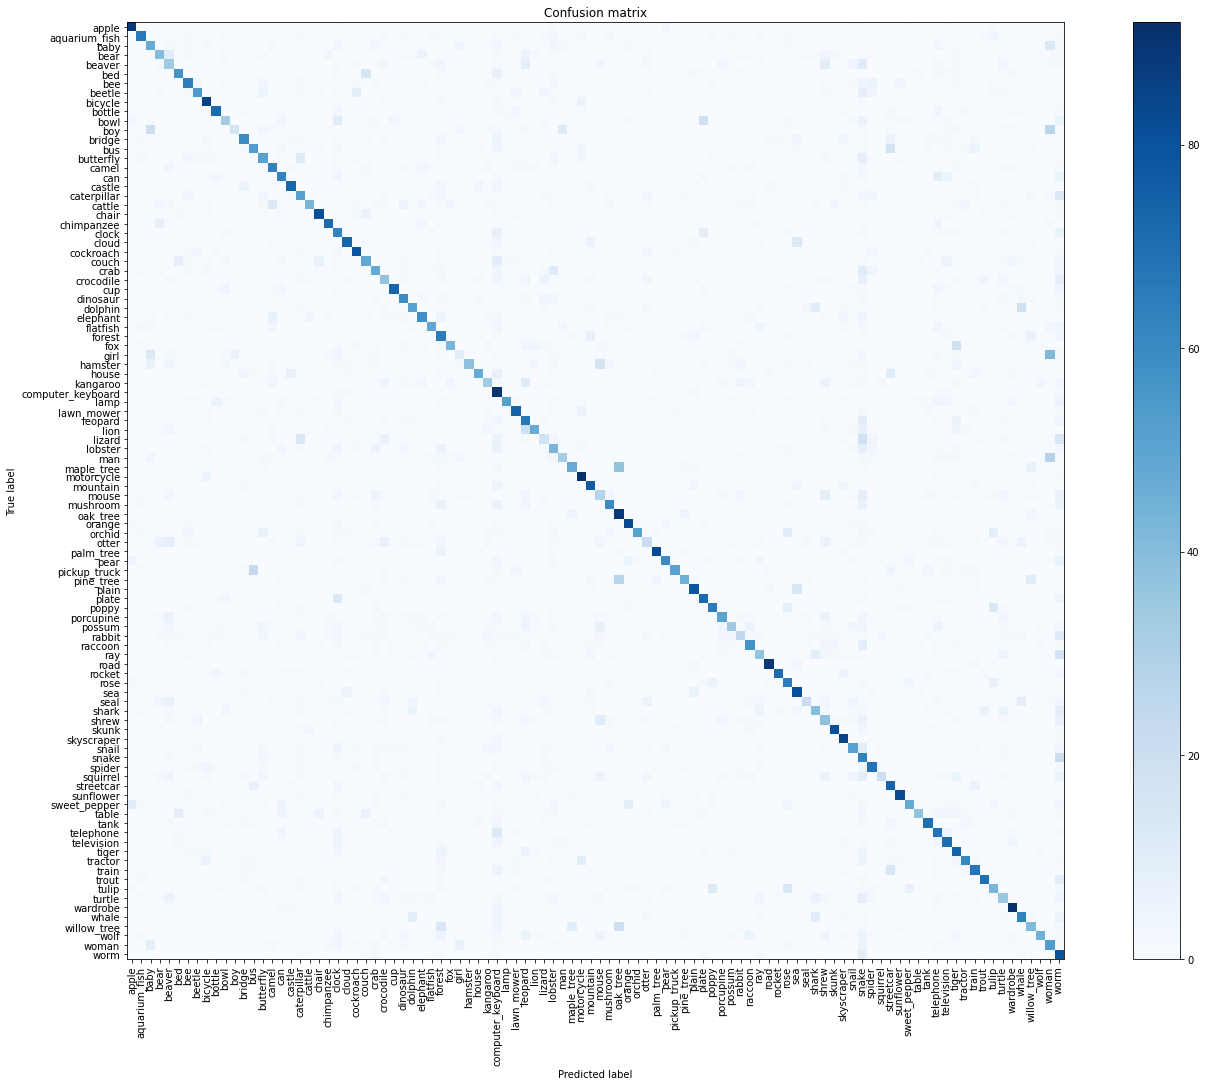

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.77      0.66      0.71       100
           2       0.46      0.47      0.46       100
           3       0.54      0.40      0.46       100
           4       0.31      0.34      0.32       100
           5       0.65      0.57      0.61       100
           6       0.67      0.64      0.65       100
           7       0.68      0.54      0.60       100
           8       0.65      0.86      0.74       100
           9       0.76      0.71      0.74       100
          10       0.49      0.33      0.39       100
          11       0.67      0.16      0.26       100
          12       0.69      0.60      0.64       100
          13       0.58      0.53      0.55       100
          14       0.50      0.51      0.50       100
          15       0.57      0.63      0.60       100
          16       0.57      0.62      0.60       100
          17       0.83    

In [48]:
# VGG report and analysis
from sklearn import metrics
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

pred = np.argmax(vgg_pred, axis=1)

vgg_f1 = metrics.f1_score(y_label_test, pred, average= "weighted")
vgg_cm = metrics.confusion_matrix(y_label_test, pred)
print("-----------------VGG Report---------------")
print("F1 score: {}".format(vgg_f1))
print("Accuracy score: {}".format(score))
print("Confusion matrix: \n", vgg_cm)
print('Plotting confusion matrix')

plt.figure(figsize = (20,15))
plot_confusion_matrix(vgg_cm, labelNames)
plt.savefig('vgg_confusion_metrics.png',figsize = (20,15))
plt.show()

print(metrics.classification_report(y_label_test, pred))